# Import MNIST data set

In [18]:
import tensorflow as tf
import pickle
import os
from datetime import datetime
from tensorflow.keras.layers import Dense, Conv2D, Flatten, LeakyReLU, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data variables
x_train = None;
x_test = None;
y_train = None;
y_test = None;

In [22]:
mnist = tf.keras.datasets.mnist;

DATASET_PATH = os.path.join("datasets", "mnist");
ROOT_LOG_DIR = 'tf_logs'

def load_dataset(dataset_path=DATASET_PATH):
    global x_train, x_test, y_train, y_test
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
        print('Creating folders....')
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        with open(os.path.join(dataset_path,'x_train.pickle'), 'wb') as handle:
            pickle.dump(x_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(os.path.join(dataset_path,'y_train.pickle'), 'wb') as handle:
            pickle.dump(y_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(os.path.join(dataset_path,'x_test.pickle'), 'wb') as handle:
            pickle.dump(x_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
        with open(os.path.join(dataset_path,'y_test.pickle'), 'wb') as handle:
            pickle.dump(y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)
    else:
        print('Folders exist. Collecting datasets...')
        with open(os.path.join(dataset_path,'x_train.pickle'), 'rb') as handle:
            x_train= pickle.load(handle)
        with open(os.path.join(dataset_path,'y_train.pickle'), 'rb') as handle:
             y_train= pickle.load(handle)
        with open(os.path.join(dataset_path,'x_test.pickle'), 'rb') as handle:
             x_test = pickle.load(handle)
        with open(os.path.join(dataset_path,'y_test.pickle'), 'rb') as handle:
             y_test = pickle.load(handle)
    print('datasets fetched.')
load_dataset()

Folders exist. Collecting datasets...
datasets fetched.


## Visualize an image from the Mnist data set

AttributeError: Unknown property size

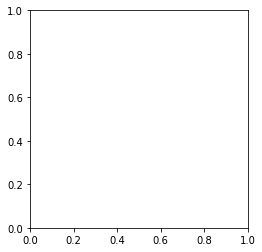

In [26]:
first_image = x_train[0]
plt.imshow(first_image, cmap='gray', size=(5,5))
plt.show()

In [ ]:
num_filter = 8

model = Sequential()
model.add(
        Conv2D(num_filter,
                 kernel_size=4,
                 strides=(1,1),
                 input_shape=[28,28,1],
                 activation=LeakyReLU(),
                 padding='same',
                )
         )

model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(1,1)))
model.add(
        Conv2D(num_filter,
                 kernel_size=4,
                 strides=(2,2),
                 activation=LeakyReLU(),
                 padding='same',
                )
         )
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

## Check input sample shape

In [ ]:
x_train.shape

In [ ]:
X = x_train.reshape((60000,28,28,1))

In [ ]:

Y = to_categorical(
    y_train,
    num_classes=10
)
map_test = [val for val in zip(Y[0:10],y_train[0:10])]
for val in map_test:
    print(val)


In [ ]:
now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
logdir = "{}/run-{}".format(ROOT_LOG_DIR, now)

In [ ]:
model.fit(X, Y, epochs=10, batch_size=32)

In [ ]:
X_TEST = x_test.reshape((10000,28,28,1))
y_pred = model.predict(X_TEST)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

In [ ]:
y_test

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)